## Experimentación - Predicción
- Se intentará predecir el valor de la variable 'fallecido', la cual contiene 2 valores (0 -> no fallece, 1 --> fallece)

- La variable surge a partir de la variable clasificacion_resumen (del dataset Casos COVID-19 provisto por el Ministerio de Salud de Argentina) luego de realizar el proceso de limpieza y pre-procesado disponible en el Notebook Limpieza_Preprocesado_Covid19Casos.ipynb

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Importamos librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Levantamos el Dataset
- Previo a realizar este paso es necesario ejecutar el Notebook: Limpieza_Preprocesado_Covid19Casos.ipynb

In [3]:
PATH = "./data/"
FILE_NAME = 'covid19_limpio.csv'
FULL_NAME = PATH + FILE_NAME

In [4]:
df = pd.read_csv(FULL_NAME)

In [5]:
dataset = df.copy(deep=True)

In [6]:
dataset.drop(dataset[dataset.covid_19_confirmado == 0].index, inplace=True)
dataset.drop(['covid_19_confirmado'], axis=1, inplace=True)
dataset

,edad,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,financiamiento_publico,sexo_f,sexo_m,sexo_nr,pcia_rec_eq_pcia_car,...,residencia_provincia_rio_negro,residencia_provincia_salta,residencia_provincia_san_juan,residencia_provincia_san_luis,residencia_provincia_santa_cruz,residencia_provincia_santa_fe,residencia_provincia_santiago_del_estero,residencia_provincia_tierra_del_fuego,residencia_provincia_tucuman,fecha_di_dif_fecha_ap
4,26,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,24
7,7,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11,29,23,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,61,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
18,22,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784807,73,23,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,17
1784808,40,23,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,120
1784810,50,23,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1784812,37,23,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,12


In [7]:
# Limpiamos nulos por si los hay
dataset = dataset.dropna()

In [8]:
dataset = dataset.convert_dtypes()

In [9]:
dataset['fallecido'] = dataset['fallecido'].astype(str)

## Variable target: fallecido

0    732767
1     24250
Name: fallecido, dtype: int64


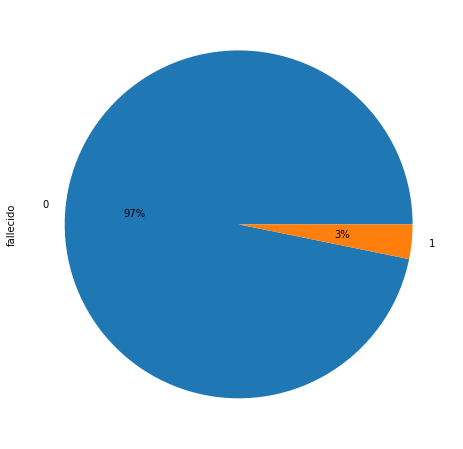

In [10]:
print(dataset.fallecido.value_counts())
dataset.fallecido.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8, 8))

### Referencias
- 0: no fallece 
- 1: fallece 

### Separar los conjuntos de train y test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
feature_names = list(dataset.columns)
feature_names.remove('fallecido')
feature_names

['edad',
 'sepi_apertura',
 'cuidado_intensivo',
 'asistencia_respiratoria_mecanica',
 'financiamiento_publico',
 'sexo_f',
 'sexo_m',
 'sexo_nr',
 'pcia_rec_eq_pcia_car',
 'residencia_provincia_buenos_aires',
 'residencia_provincia_caba',
 'residencia_provincia_catamarca',
 'residencia_provincia_chaco',
 'residencia_provincia_chubut',
 'residencia_provincia_Corrientes',
 'residencia_provincia_cordoba',
 'residencia_provincia_entre_rios',
 'residencia_provincia_formosa',
 'residencia_provincia_jujuy',
 'residencia_provincia_la_pampa',
 'residencia_provincia_la_rioja',
 'residencia_provincia_mendoza',
 'residencia_provincia_misiones',
 'residencia_provincia_neuquen',
 'residencia_provincia_rio_negro',
 'residencia_provincia_salta',
 'residencia_provincia_san_juan',
 'residencia_provincia_san_luis',
 'residencia_provincia_santa_cruz',
 'residencia_provincia_santa_fe',
 'residencia_provincia_santiago_del_estero',
 'residencia_provincia_tierra_del_fuego',
 'residencia_provincia_tucuman',
 

In [13]:
X = dataset[feature_names]
y = dataset['fallecido']

In [14]:
X.shape, y.shape

((757017, 34), (757017,))

#### Train - Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((605613, 34), (151404, 34), (605613,), (151404,))

## Modelado

In [17]:
from sklearn import ensemble

In [18]:
clf = ensemble.RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

## Evaluación

In [19]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

### Acuracy

In [20]:
print ('Accuracy Train: %d ' % ((np.sum(y_train == y_pred_train))/float(y_train.size)*100))

Accuracy Train: 98 


In [21]:
print ('Accuracy Test: %d ' % ((np.sum(y_test == y_pred_test))/float(y_test.size)*100))

Accuracy Test: 96 


### Precision

In [22]:
from sklearn.metrics import precision_score

precision_train = precision_score(y_train, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

print('Precision train: ' + str(precision_train))
print('Precision test: ' + str(precision_test))

Precision train: 0.9864750905682458
Precision test: 0.9636189336173616


### Recall

In [23]:
from sklearn.metrics import recall_score

recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print('Recall train: ' + str(recall_train))
print('Recall test: ' + str(recall_test))

Recall train: 0.9871171853972751
Recall test: 0.9690496948561464


### F1-Score

In [24]:
from sklearn.metrics import f1_score

f1_score_train = f1_score(y_train, y_pred_train, average='weighted')
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

print('F1-Score train: ' + str(f1_score_train))
print('F1-Score test: ' + str(f1_score_test))

F1-Score train: 0.9860752132345677
F1-Score test: 0.9655744841765938


## Confusion Matrix

In [29]:
from sklearn.metrics import plot_confusion_matrix

### Train

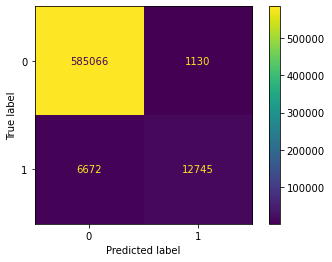

In [30]:
plot_confusion_matrix(clf, X_train, y_train) 
plt.show()

### Test

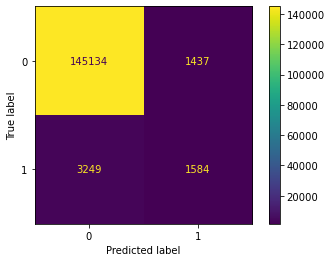

In [31]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

### Predicciones sobre el conjunto de test

In [26]:
def predict_examples(indices, cant, show_message=False):
    cant_correctas = 0
    cant_incorrectas = 0
    
    if cant > len(indices):
        cant = len(indices)
        
    for index in indices[:cant]:
        x = X_test.loc[index]
        x = np.array(x).reshape(1, -1)
        y = y_test.loc[index]
        y_pred = clf.predict(x)
        if (y == y_pred[0]):
            cant_correctas += 1
            if show_message:
                print('Predicción correcta')
        else:
            cant_incorrectas += 1
            if show_message:              
                print('Predicción errónea')
            
    print('Cantidad predicciones correctas: ' + str(cant_correctas))
    print('Cantidad predicciones totales: ' + str(cant))
    porc_correctas = (cant_correctas * 100) / cant
    print('Porcentaje predicciones correctas: ' + str(porc_correctas) + "%")

#### Predicción de fallecidos (sobre el conjunto de test)

In [27]:
fallecidos_test = list(y_test.loc[lambda x: x == '1'].index)

predict_examples(fallecidos_test, 1000)

Cantidad predicciones correctas: 340
Cantidad predicciones totales: 1000
Porcentaje predicciones correctas: 34.0%


#### Predicción de sobrevivientes (sobre el conjunto de test)

In [28]:
sobrevivientes_test = list(y_test.loc[lambda x: x == '0'].index)

predict_examples(sobrevivientes_test, 1000)

Cantidad predicciones correctas: 991
Cantidad predicciones totales: 1000
Porcentaje predicciones correctas: 99.1%
